In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt      
from datetime import datetime
from datetime import timedelta
import sklearn
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import linear_model, metrics, preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score 
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error ,mean_absolute_error
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy.stats import boxcox
from sklearn.feature_selection import SelectKBest, f_regression

from ipynb.fs.full.set_up import data_prep


In [2]:
def tune_model(X_train_scaled, y_train):
    params = {'fit_intercept': [True, False], 'normalize': [True, False]}
    grid_search_cv = GridSearchCV(LinearRegression(), params, n_jobs=-1, verbose=1, cv=5)
    grid_search_cv.fit(X_train_scaled, y_train)
    best_params = grid_search_cv.best_params_
    best_score = grid_search_cv.best_score_
    return best_params, best_score

def return_best_model(X_train_scaled, y_train, best_params):
    reg = LinearRegression(**best_params)
    reg.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    return reg, y_pred


def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, r2



Prep
(58437, 24)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'fit_intercept': True, 'normalize': False}
Best Score: 0.6317437141233425
MAE: 456155.80087744124
R2: 0.648882271967768


,Date,Street,Type,Rooms,Floor,Size,Price,New,Build_year,Rebuilt,...,Home_number,Long,Lat,UniqueId,Neighborhood,Year,Predicted_Price,Percentage_Change,Distance_sea,Train
0,2009-03-08,רב אשי,דירה בבית קומות,4.0,1,108,2350000,NaN,1970,0,...,13,181262.55,669790.75,527-98565,נווה אביבים וסביבתה,2009,3742994,59.276,1575,2362
1,2009-03-08,יונה הנביא,דירה בבית קומות,4.0,3,100,265000,NaN,1935,0,...,44,178329.82,664370.23,527-70100,כרם התימנים,2009,422082,59.276,515,2388
2,2009-03-08,בית צורי אליהו,דירה בבית קומות,4.0,1,76,1242000,NaN,1970,0,...,28,181400.28,670121.86,527-99993,רמת אביב ג,2009,1978212,59.276,1601,2555
3,2009-03-08,קהילת קנדה,דירה בבית קומות,2.5,2,42,300000,NaN,1970,0,...,25,176787.25,659914.06,527-111597,יפו ד (גבעת התמרים,2009,477829,59.276,467,5543
4,2009-03-08,בן עזרא,דירה בבית קומות,2.0,2,52,1340000,NaN,1970,0,...,5,179374.62,665694.23,527-75923,הצפון הישן-החלק הצפוני,2009,2134303,59.276,1085,1732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58940,2004-07-14,"מזא""ה",דירה בבית קומות,3.0,3,69,1254000,NaN,1980,0,...,60,179377.39,663624.92,527-130099,לב העיר,2004,2186393,74.354,1745,1643
58941,2004-07-14,ארלוזורוב,דירה בבית קומות,3.0,3,68,735000,NaN,1960,0,...,43,179152.03,665985.03,527-73562,הצפון הישן-החלק הצפוני,2004,1281498,74.354,782,2245
58942,2004-07-14,אושה,דירה בבית קומות,4.5,2,110,1123000,NaN,2020,0,...,11,180782.08,669675.08,527-99656,נווה אביבים וסביבתה,2004,1957990,74.354,1157,2726
58943,2004-07-14,בויאר אברהם,דירה בבית קומות,5.0,8,135,1662000,NaN,1990,0,...,3,180998.17,670110.98,527-100486,רמת אביב ג,2004,2897755,74.354,1223,2946


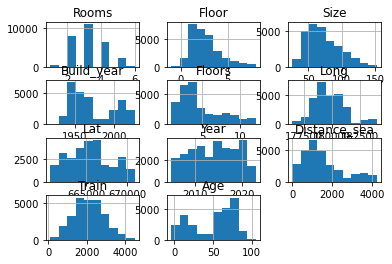

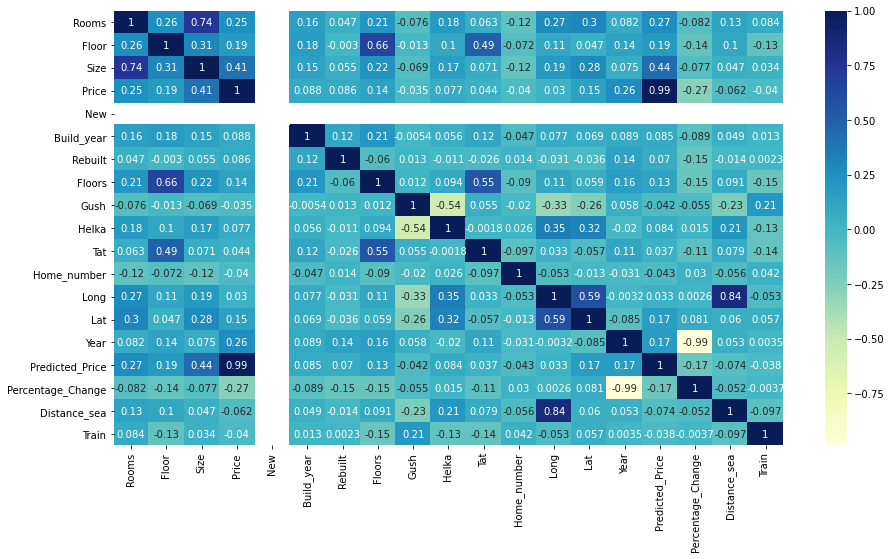

In [3]:
df = pd.read_csv("../Data/Nadlan_clean.csv",index_col=0)

#1. Prep the data
X_train_scaled,  X_test_scaled  ,y_train, y_test , X_train, X_test = data_prep()

#2. Find best params

best_params, best_score = tune_model(X_train_scaled, y_train)

#3. Return Best Model
model, y_pred = return_best_model(X_train_scaled, y_train, best_params)

#4. Evaluate Model
mae, r2 = evaluate_model(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("MAE:", mae)
print("R2:", r2)

X_train.hist()
plt.figure(figsize=(15,8))
# sns.heatmap(X_train.corr(), annot =True ,cmap ='YlGnBu')
sns.heatmap(df.corr(), annot =True ,cmap ='YlGnBu')
df

In [7]:
def recommend_affordable_apartments(df, model):
    y = df['Price']
    X = df.drop('Price', axis=1)
    
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Predict prices using the trained model
    y_pred = model.predict(X_scaled)
    df["PREDICTED_PRICE"] = y_pred
    df["PREDICTED_PRICE"] = df["PREDICTED_PRICE"].astype(int)
    df['difference'] =  df["Price"] -  df["PREDICTED_PRICE"] 
    
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f'r2_score: {r2} , mae: {mae}')
    return df.sort_values(by="difference")


yad2_df = data_prep(valid = True)
yad2_df.head()
yad_2_results = recommend_affordable_apartments(yad2_df,model)
yad_2_results




Prep
(429, 15)
r2_score: -2.824884219582998 , mae: 3911806.152849741


,Rooms,Floor,Size,Price,Build_year,Floors,Long,Lat,Year,Distance_sea,Train,Age,PREDICTED_PRICE,difference
247,3,3,80,1600000,1940,3,178202,664383,2023,390,2503,83,1026048,573952
196,3,1,53,1450000,1950,2,178464,663304,2023,981,2235,73,632832,817168
205,7,0,151,1750000,1950,2,180114,662105,2023,2926,613,73,851968,898032
388,1,2,30,1880000,1948,3,177233,662315,2023,127,2697,75,440320,1439680
52,1,0,28,1650000,2000,2,176474,660801,2023,111,4970,23,182272,1467728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,6,1,175,11500000,2016,1,176984,662149,2023,55,3112,7,1599488,9900512
88,4,7,160,11600000,1965,7,179636,665742,2023,1318,1518,58,1624064,9975936
148,5,2,160,11500000,1991,5,178778,664136,2023,1014,2174,32,1513472,9986528
174,4,12,126,11500000,1993,28,178106,663335,2023,631,2624,30,1122304,10377696
